In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy import stats

from imblearn.ensemble import BalancedBaggingClassifier
import warnings;
warnings.filterwarnings('ignore');

In [6]:
dataset_directory = 'Dataset/bank-additional-full.csv'

raw_dataset = pd.read_csv(dataset_directory,sep = ',')
raw_dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
raw_dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [9]:
cat_dataset = raw_dataset.select_dtypes(include = ['object'])
num_dataset = raw_dataset.select_dtypes(include = ['float64','int64'])
num_dataset = pd.concat([num_dataset,raw_dataset['y']], axis = 1)

num_dataset.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
num_dataset['y'] = num_dataset['y'].map(lambda x: 0 if x == 'no' else 1)
num_dataset.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [11]:
cat_dataset.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


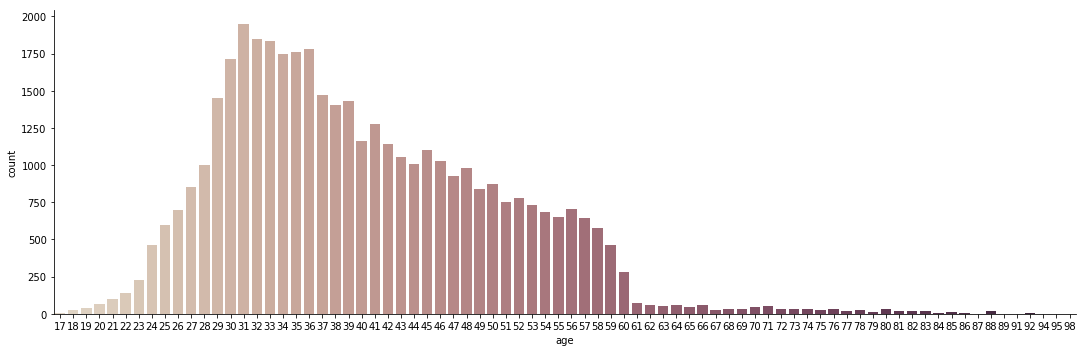

In [12]:
sns.catplot(x="age", kind="count", palette="ch:.25", data=raw_dataset, aspect = 3)

Podemos agrupar en rangos de edades para asemejar en lo posible a una distribucion normal.

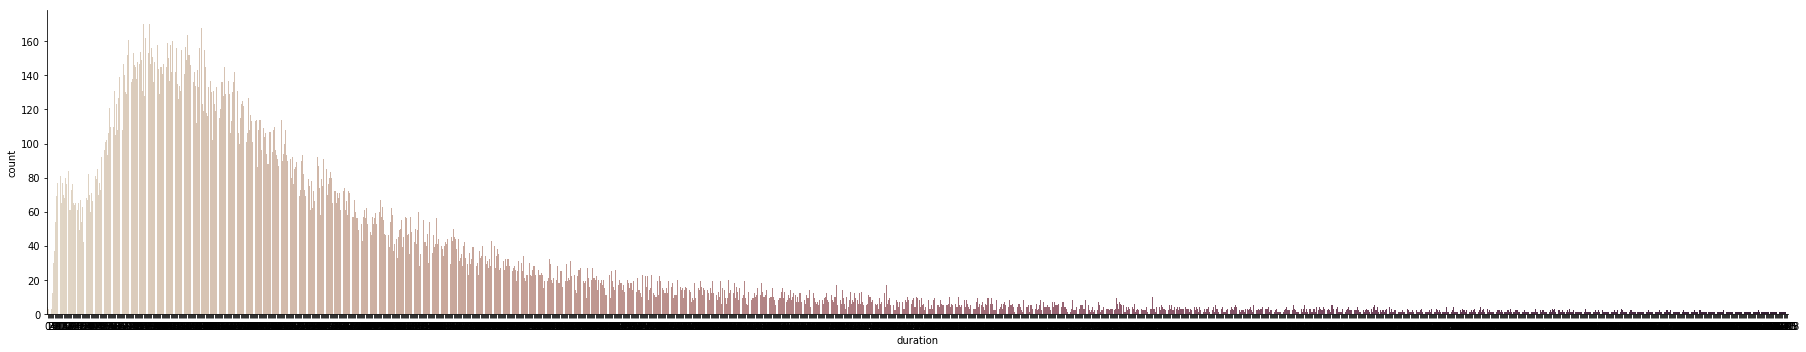

In [13]:
sns.catplot(x="duration", kind="count", palette="ch:.25", data=raw_dataset, aspect = 5)

Podriamos agrupar la duracion en rangos para determinar el nivel de interes. La __hipotesis__ esta en que entre menos larga sea la duracion de la llama mas interes siente el cliente.

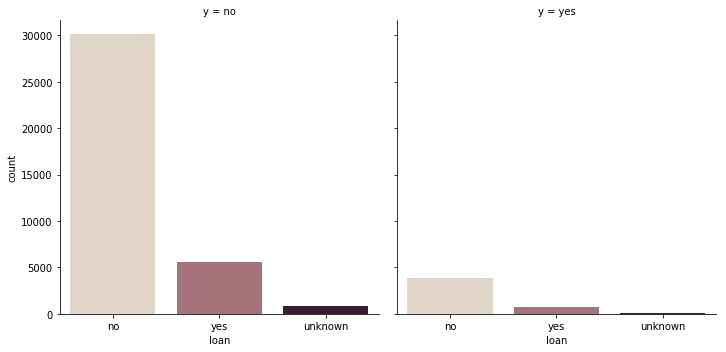

In [14]:
sns.catplot(x="loan", kind="count",col = 'y', palette="ch:.25", data=raw_dataset)

Segun el grafico arriba, existe mas probabilidad que un cliente me diga 'yes' si NO tiene prestamos.

In [15]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self._feature_names = feature_names
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X[self._feature_names]

numerical_pipeline = Pipeline([
    ('select_numeric',FeatureSelector((x for x in num_dataset.columns if x not in 'y'))),
    ('standarize',MinMaxScaler(feature_range = (0,5)))
])

categorical_pipeline = Pipeline([
    ('select_categoric', FeatureSelector((x for x in cat_dataset.columns if x not in 'y'))),
    ('cat_encoder',OneHotEncoder(sparse=False))
])

preprocess_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline',numerical_pipeline),
    ('cat_pipeline',categorical_pipeline)
])

    
    

In [16]:
X_raw_dataset = raw_dataset.drop(['y'],axis = 1)
y_data = pd.DataFrame(raw_dataset['y'].map(lambda x: 1 if x == 'yes' else 0))

In [17]:
X_data = preprocess_pipeline.fit_transform(X_raw_dataset)

In [18]:
#splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.20, random_state = 42, stratify = y_data)

In [22]:
def model_train_fit(X_train, y_train, X_test, y_test):
    names = ["Nearest Neighbors","Decision Tree", "Random Forest", "Logistic Regression",'Naives Bayes',
             'SVC','Balanced Bagging']
    classifiers = [
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100, random_state=42),
        LogisticRegression(random_state=42),
        GaussianNB(),
        SVC(kernel = 'linear', C = 0.025, random_state=42),
        BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                  sampling_strategy='auto',replacement=False,random_state=0, n_jobs=-1)]
    for name, clf in zip(names, classifiers):
        scores = cross_val_score(clf, X_train, y_train, cv=5, n_jobs = -1)
        print(name)
        print("Cross validation scores -> {}".format(scores))
        print("Cross validation mean -> {}".format(scores.mean()))

        clf.fit(X_train,y_train )
        predicted = clf.predict(X_test)
        #proba_score = clf.predict_proba(X_test)

        target_names = ['0','1']
        #print(roc_auc_score(y_test, proba_score[:,1]))
        #precision, recall, thresholds = precision_recall_curve(y_test, proba_score[:,1])
        #print('Precision: {}, recall: {}, threshold: {}'.format(precision,recall,thresholds))
        print(confusion_matrix(y_test, predicted,labels = [0,1]))
        print(classification_report(y_test, predicted, target_names=target_names))
       # plt.plot(recall,precision)
        #plt.show()
        print('\n')

In [ ]:
model_train_fit(X_train, y_train, X_test, y_test)

In [33]:
def model_train_fit_balanced(X_train, y_train, X_test, y_test):
    names = ["Nearest Neighbors","Decision Tree", "Random Forest", "Logistic Regression",'Naives Bayes',
             'SVC']
    classifiers = [
        BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(),
                                  sampling_strategy='auto',replacement=False,random_state=0, n_jobs=-1),
        
        BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                  sampling_strategy='auto',replacement=False,random_state=0, n_jobs=-1),
        
        BalancedBaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                                  sampling_strategy='auto',replacement=False,random_state=0, n_jobs=-1),
        
        BalancedBaggingClassifier(base_estimator=LogisticRegression(random_state=42),
                                  sampling_strategy='auto',replacement=False,random_state=0, n_jobs=-1),
        
        BalancedBaggingClassifier(base_estimator=GaussianNB(),
                                  sampling_strategy='auto',replacement=False,random_state=0, n_jobs=-1),

        BalancedBaggingClassifier(base_estimator=SVC(kernel = 'linear', C = 0.025, random_state=42),
                                  sampling_strategy='auto',replacement=False,random_state=0, n_jobs=-1)]
    
    for name, clf in zip(names, classifiers):
        #scores = cross_val_score(clf, X_train, y_train, cv=5, n_jobs = -1)
        print(name)
        #print("Cross validation scores -> {}".format(scores))
        #print("Cross validation mean -> {}".format(scores.mean()))

        clf.fit(X_train,y_train )
        predicted = clf.predict(X_test)
        proba_score = clf.predict_proba(X_test)
        print('Model score -> {}'.format(clf.score(X_test,y_test)))
        
        target_names = ['0','1']
        print('AUC score -> {}'.format(roc_auc_score(y_test, proba_score[:,1])))
        #precision, recall, thresholds = precision_recall_curve(y_test, proba_score[:,1])
        #print('Precision: {}, recall: {}, threshold: {}'.format(precision,recall,thresholds))
        print(confusion_matrix(y_test, predicted,labels = [0,1]))
        print(classification_report(y_test, predicted, target_names=target_names))
       # plt.plot(recall,precision)
        #plt.show()
        print('\n')

In [34]:
model_train_fit_balanced(X_train, y_train, X_test, y_test)


Nearest Neighbors
Model score -> 0.8390386016023307
AUC score -> 0.8786161051228831
[[6195 1115]
 [ 211  717]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      7310
           1       0.39      0.77      0.52       928

    accuracy                           0.84      8238
   macro avg       0.68      0.81      0.71      8238
weighted avg       0.90      0.84      0.86      8238



Decision Tree
Model score -> 0.8822529740228211
AUC score -> 0.9384528014293126
[[6466  844]
 [ 126  802]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7310
           1       0.49      0.86      0.62       928

    accuracy                           0.88      8238
   macro avg       0.73      0.87      0.78      8238
weighted avg       0.93      0.88      0.90      8238



Random Forest
Model score -> 0.8690216071862102
AUC score -> 0.9514372729845747
[[6290 1020]
 [  59  869]]
              pre

Puedo concluir que el resultado obtenido es bastante bueno utilizando Random Forest. En este caso, los datos estan desbalanceados y se esperaba que el resultado fuera muy bueno para clasificar en la clase 'no'.

Ahora nos interesa enfocarnos en los FN(482) de la matriz de confusion. Hay que reducir ese numero ya que estariamos perdiendo clientes potenciales al clasificarlos como 'no' cuando en realidad son 'yes'. La idea es maximizar la cantidad de 'yes' que obtenemos.

Por otra parte, los FP(186) tienen un valor aceptable. Aunque el modelo haya clasificado a 186 clientes como 'yes' cuando en realidad son 'no', hay posibilidad de convertir esos clientes en un 'yes' por pura suerte u ofreciendo ofertas especializadas a estos clientes.

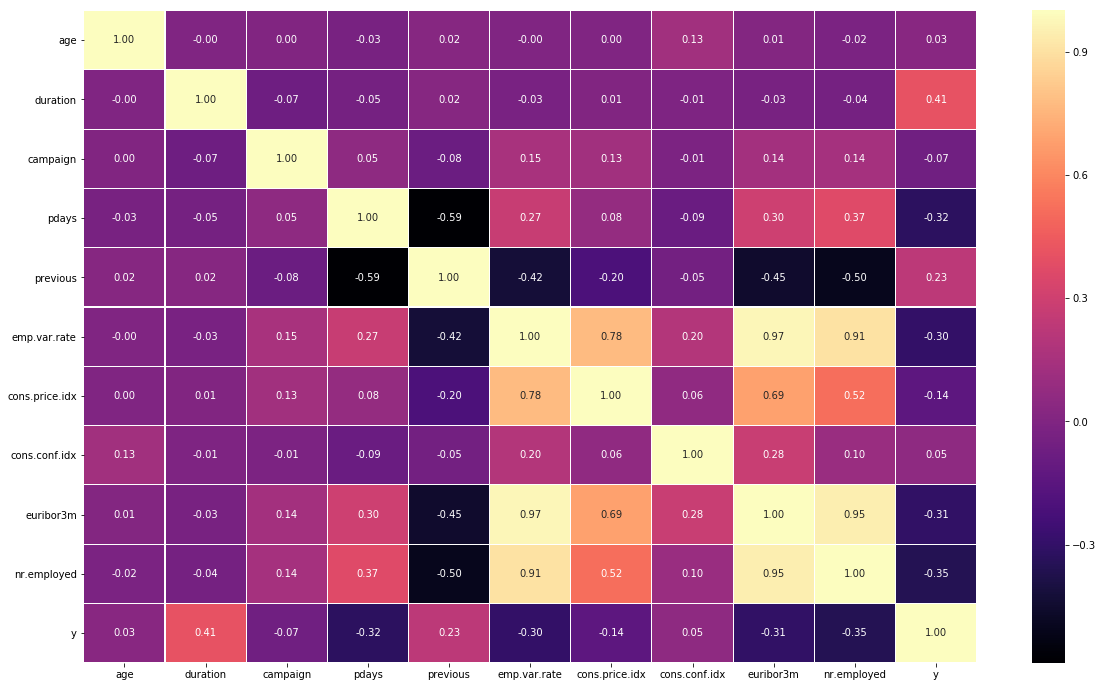

In [18]:
# plot correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(num_dataset.corr(), annot=True, linewidths=0.05, fmt='.2f',cmap="magma")
plt.show()

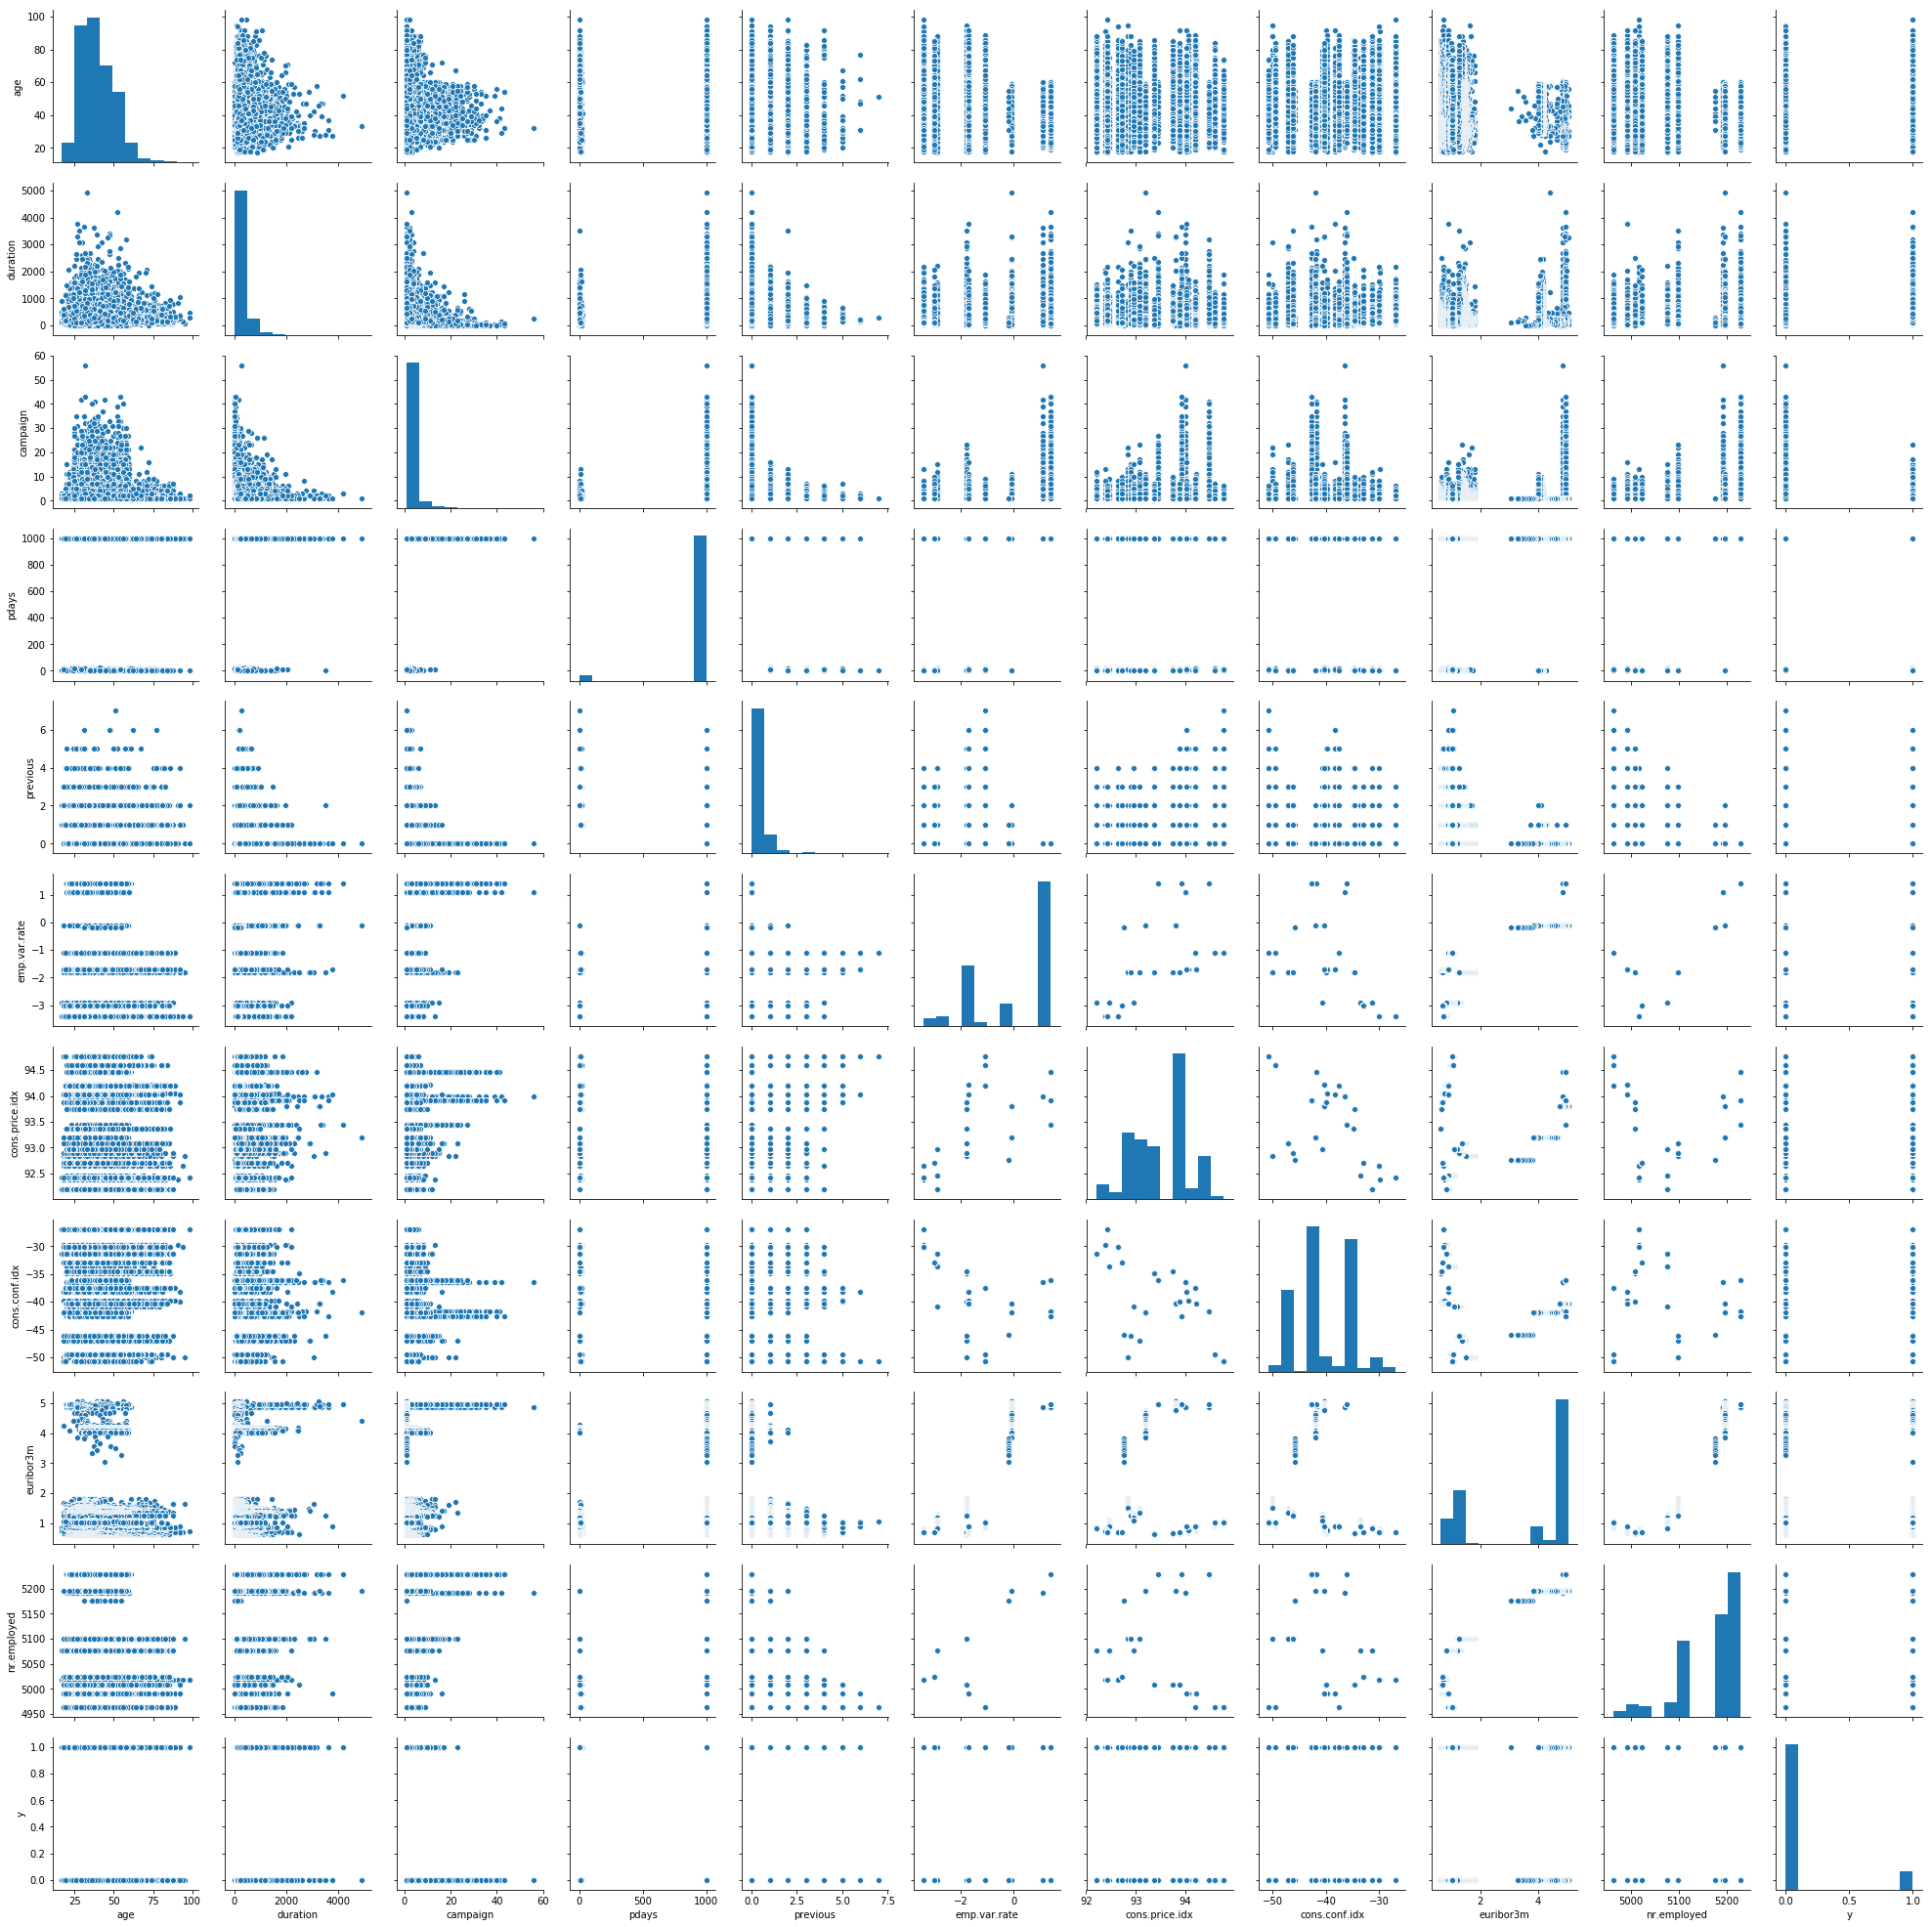

In [19]:
sns.pairplot(num_dataset)

In [44]:
for i in cat_dataset.columns:
    cont_table = pd.crosstab(cat_dataset['y'],cat_dataset[i])
    stat, p, dof, expected = stats.chi2_contingency(cont_table)
    # interpret p-value
    prob = 0.95
    alpha = 1.0 - prob
    if p <= alpha:
        print('Dependent (reject H0) --> {}'.format(i))
    else:
        print('Independent (fail to reject H0) --> {}'.format(i))

Dependent (reject H0) --> job
Dependent (reject H0) --> marital
Dependent (reject H0) --> education
Dependent (reject H0) --> default
Independent (fail to reject H0) --> housing
Independent (fail to reject H0) --> loan
Dependent (reject H0) --> contact
Dependent (reject H0) --> month
Dependent (reject H0) --> day_of_week
Dependent (reject H0) --> poutcome
Dependent (reject H0) --> y


Esto significa que las variables "housing" y "loan" tienen mayor probabilidad de ser variables independientes.

In [70]:
list1 = ['duration','pdays','previous','emp.var.rate','euribor3m','nr.employed']
list2 = ['job','marital','education','default','contact','month','day_of_week','poutcome']
numerical_pipeline2 = Pipeline([
    ('select_numeric',FeatureSelector(list1)),
    ('standarize',MinMaxScaler(feature_range = (0,5)))
])

categorical_pipeline2 = Pipeline([
    ('select_categoric', FeatureSelector(list2)),
    ('cat_encoder',OneHotEncoder(sparse=False))
])

preprocess_pipeline2 = FeatureUnion(transformer_list = [
    ('num_pipeline',numerical_pipeline2),
    ('cat_pipeline',categorical_pipeline2)
])

In [71]:
X_data = preprocess_pipeline2.fit_transform(X_raw_dataset)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.20, random_state = 42, stratify = y_data)

In [72]:
model_train_fit(X_train, y_train, X_test, y_test)

Nearest Neighbors
Cross validation scores -> [0.89485662 0.89819451 0.89347496 0.89603885 0.89482471]
Cross validation mean -> 0.8954779305745113
[[7097  213]
 [ 609  319]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7310
           1       0.60      0.34      0.44       928

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.76      0.66      0.69      8238
weighted avg       0.88      0.90      0.89      8238



Decision Tree
Cross validation scores -> [0.89060841 0.89182218 0.88118361 0.88313856 0.89133404]
Cross validation mean -> 0.8876173609110378
[[6892  418]
 [ 420  508]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.55      0.55      0.55       928

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.75      0.75      0.75      8238
weighted avg       0.90      0.90      0.90      8238





Luego de quitar los features que menos correlacion tienen los diferentes modelos muestran resultados muy similares a los anteriores, con diferencias muy bajas que podemos despreciar. Esto nos lleva a afirmar que realmente esas features no afectan a las etiquetas que queremos predecir y, por tanto, se pueden eliminar para mejorar el rendimiento de nuestro algoritmo.